In [9]:
!fiftyone datasets delete "Zero-Shot Classification"

Dataset 'Zero-Shot Classification' deleted


Dataset already downloaded
Loading existing dataset 'caltech256-1000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use



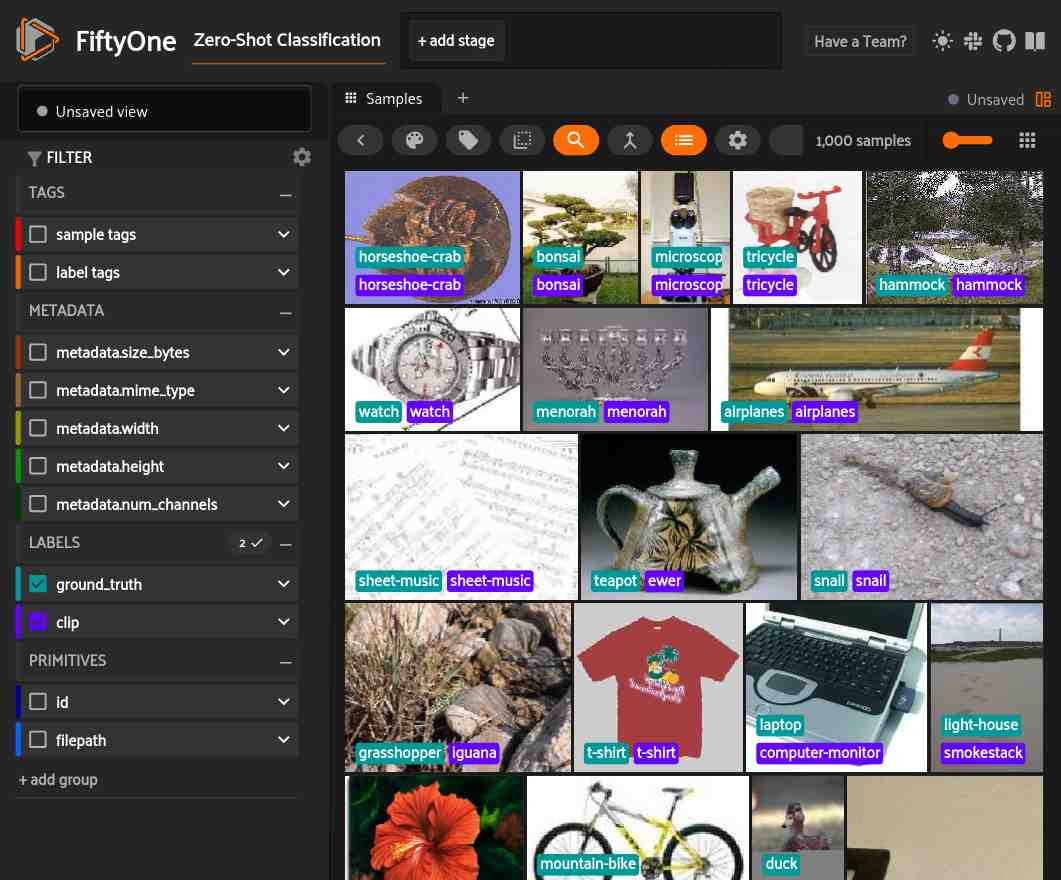

In [10]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset(
    "caltech256",
    max_samples=1000,
    shuffle=True
)

dataset.name = "Zero-Shot Classification"

session = fo.launch_app(dataset)

In [11]:
classes = dataset.distinct("ground_truth.label")

In [12]:
clip = foz.load_zoo_model(
    "clip-vit-base32-torch",
    classes=classes,
)

dataset.apply_model(clip, label_field="clip")

/home/dan/anaconda3/envs/dev/lib/python3.9/site-packages/torch/cuda/__init__.py:141: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


 100% |███████████████| 1000/1000 [28.3s elapsed, 0s remaining, 31.0 samples/s]      


In [16]:
model = foz.load_zoo_model(
        "zero-shot-classification-transformer-torch",
        name_or_path="kakaobrain/align-base",
        classes=classes,
    )

dataset.apply_model(model, label_field="AltCLIP")


config.json:   0%|          | 0.00/5.25k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/690M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

   0% ||--------------|    0/1000 [3.0ms elapsed, ? remaining, ? samples/s] 

/home/dan/anaconda3/envs/dev/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2692: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


 100% |███████████████| 1000/1000 [14.6m elapsed, 0s remaining, 1.1 samples/s]      


In [17]:
session.show()